# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined = pd.merge(mouse_metadata, study_results, how="outer", on = "Mouse ID")

# Display the data table for preview
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [80]:
# Checking the number of mice.
len(mouse_study_combined["Mouse ID"].unique())

249

In [81]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_combined[mouse_study_combined[["Mouse ID", "Timepoint"]].duplicated()]
duplicates.loc[:, "Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#keep only rows that do not have mouse ID g989
mouse_study_clean = mouse_study_combined[mouse_study_combined["Mouse ID"] != "g989"]
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [83]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean["Mouse ID"].unique())

248

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_type = mouse_study_clean.groupby(["Drug Regimen"])
mean = drug_type["Tumor Volume (mm3)"].mean()
median = drug_type["Tumor Volume (mm3)"].median()
var = drug_type["Tumor Volume (mm3)"].var()
std = drug_type["Tumor Volume (mm3)"].std()
sem = (drug_type["Tumor Volume (mm3)"]).sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                             "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std,
                             "Tumor Volume Std. Err": sem})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

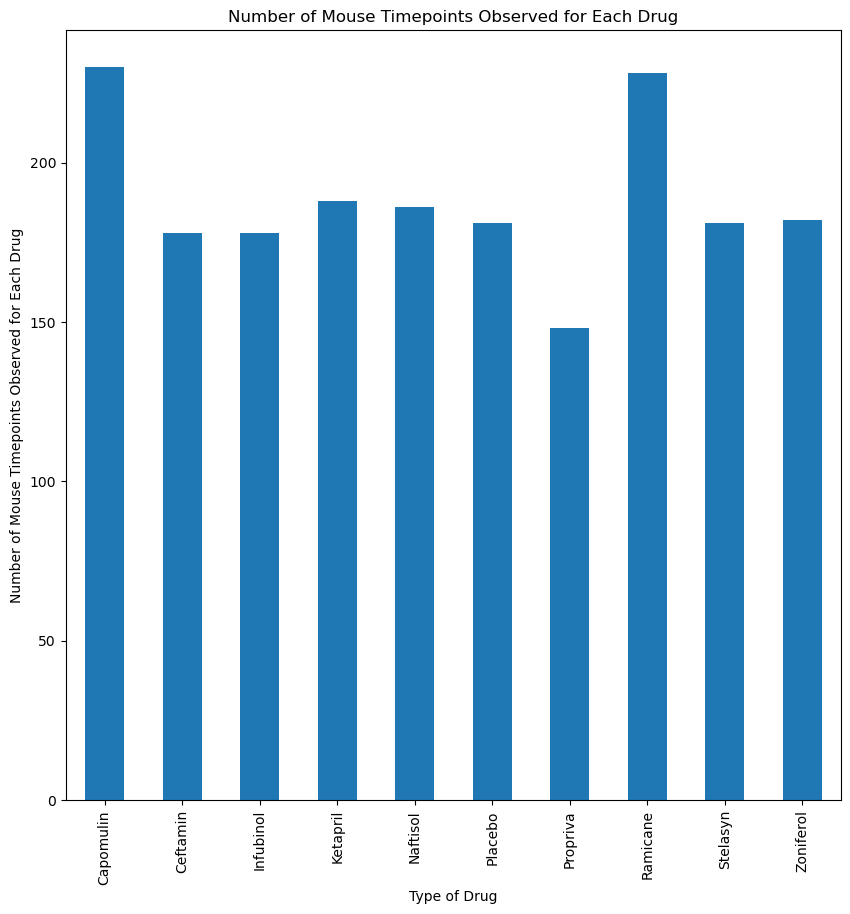

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#x_axis will be each of the types of drugs, y_axis will be the number of data points for each drug
mouse_id_count = drug_type["Mouse ID"].count()

#create figure
mouse_id_count.plot(kind = "bar", figsize=(10,10), title="Number of Mouse Timepoints Observed for Each Drug",
                    xlabel="Type of Drug", ylabel="Number of Mouse Timepoints Observed for Each Drug")

plt.show()


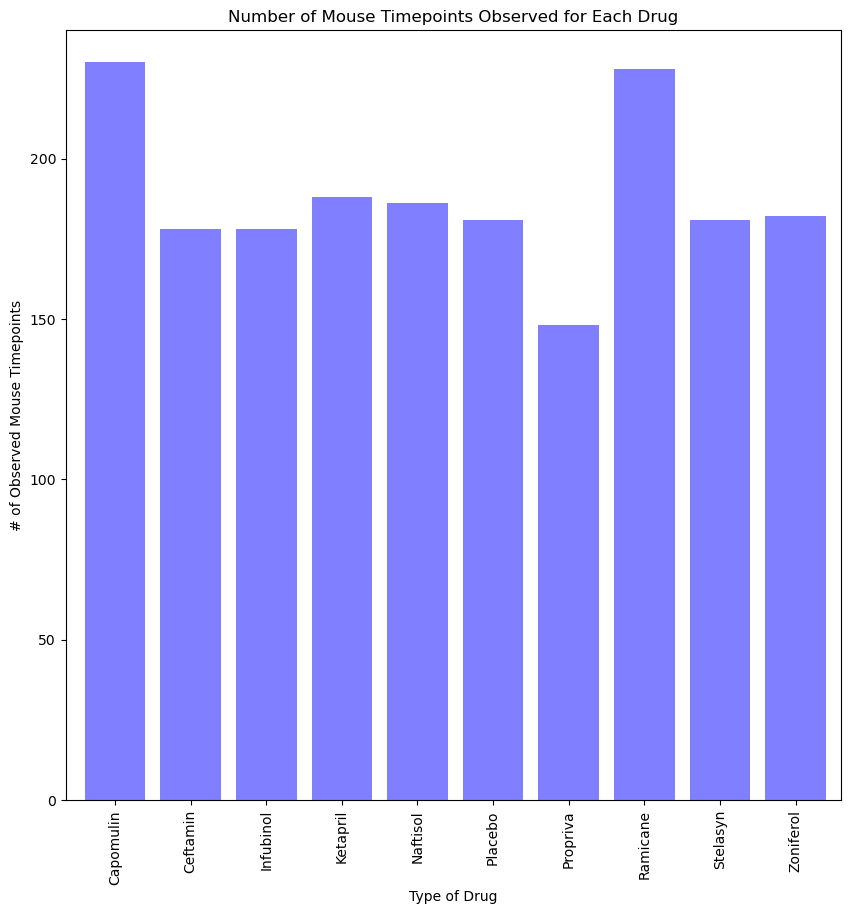

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_summary))
y_axis = drug_type["Mouse ID"].count()
tick_locations = [value + 0.4 for value in x_axis]

#create figure
plt.figure(figsize=(10,10))
plt.bar(x_axis, y_axis, alpha=0.5, align="edge", color="b")
#add information to figure
plt.xticks(tick_locations, drug_summary.index, rotation = "vertical")
plt.xlabel("Type of Drug")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mouse Timepoints Observed for Each Drug")
#formatting
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(y_axis)+10)

plt.show()

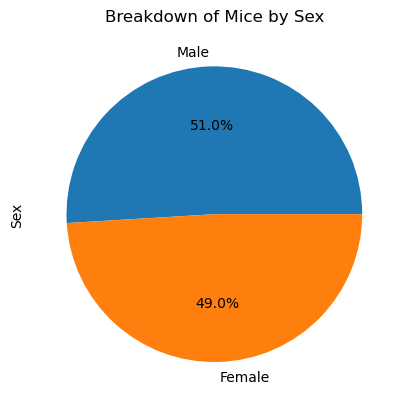

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#calculate number of each sex & assign to new variable
sex_breakdown = mouse_study_clean["Sex"].value_counts()
#plot, format percentages, add titles
sex_breakdown.plot(kind = "pie", title = "Breakdown of Mice by Sex",
                   ylabel="Sex", autopct="%1.1f%%")

plt.show()

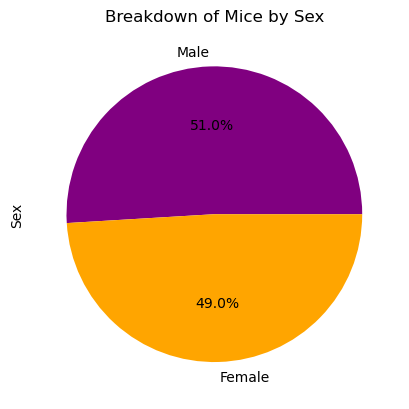

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#calculate number of each sex
sex_breakdown = mouse_study_clean["Sex"].value_counts()
#assign number of each sex to variables
male = sex_breakdown[0]
female = sex_breakdown[1]
#prepare variables for pie chart
values = [male, female]
labels = ["Male", "Female"]
colors = ["purple", "orange"]

#plot, format percentages, add titles
plt.pie(values, labels = labels, colors = colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Breakdown of Mice by Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_study_clean = mouse_study_clean.set_index("Mouse ID")
mouse_study_clean.head()
# Start by getting the last (greatest) timepoint for each mouse
#final_tumor_vol = mouse_study_clean.groupby(["Mouse ID"]).max()["Timepoint"]
#final_tumor_vol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#mouse_study_clean["Highest Timepoint"] = final_tumor_vol
#mouse_study_clean.head(50)

#mouse_study_clean = mouse_study_clean.set_index("Mouse ID")
#mouse_study_clean.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

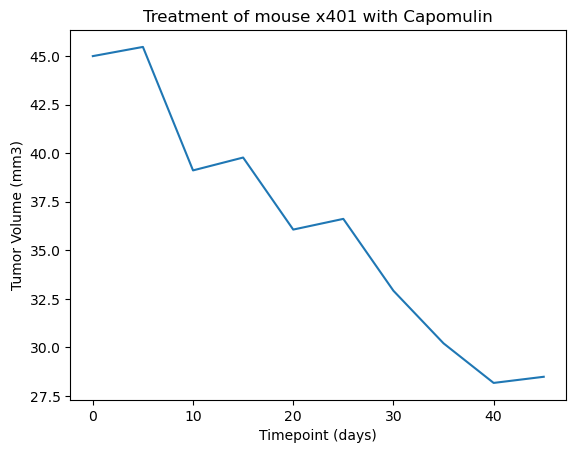

In [93]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#chose a single mouse randomly that is taking Capomulin
single_mouse = mouse_study_clean.loc["x401", :]
single_mouse

#define axes
x_axis = single_mouse["Timepoint"]
y_axis = single_mouse["Tumor Volume (mm3)"]

#create plot
plt.plot(x_axis, y_axis)
plt.title("Treatment of mouse x401 with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

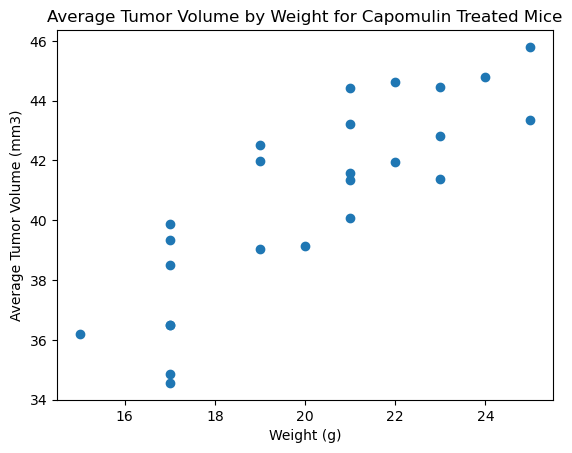

In [94]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]

#define x and y axis
#take avg of weight for each mouse to have two of same size groups for plotting
avg_tumor = capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight = capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()

#create plot
plt.scatter(weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight for Capomulin Treated Mice")

plt.show()

## Correlation and Regression

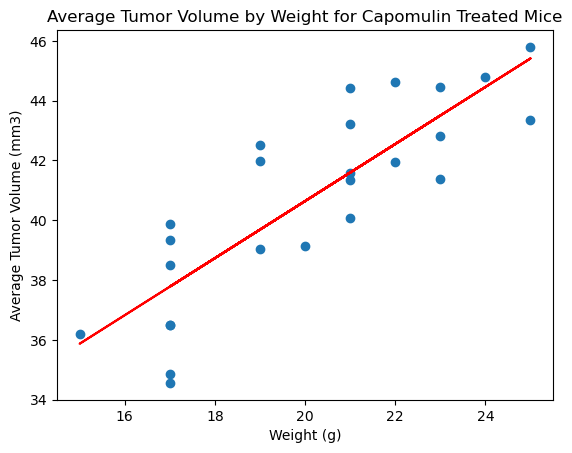

The equation of the line is: Average Tumor Volume (mm3) = 0.95  * Weight (g) + 21.55
The correlation between mouse weight and the average tumor volume is 0.84.


In [109]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#get linear regression values from weight & tumor data
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor)
#y = mx + b
regress_values = weight * slope + intercept
line_eq = "Average Tumor Volume (mm3) = " + str(round(slope,2)) + "  * Weight (g) + " + str(round(intercept, 2))
#plot values
plt.scatter(weight, avg_tumor)
plt.plot(weight, regress_values, "r-")
#label plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight for Capomulin Treated Mice")

plt.show()
print(f'The equation of the line is: {line_eq}')
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}.')